In [33]:
import pandas as pd
import numpy as np
import glob
import torchaudio
from torchaudio import transforms
import matplotlib.pyplot as plt
from IPython.display import Audio

In [3]:
METADATA_FILE = 'data/metadata_compiled.csv'

metadata_df = pd.read_csv(METADATA_FILE)
metadata_df.head()

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
BASE_PATH = 'data/'
def get_audio_file(uuid):
    results = glob.glob(BASE_PATH + uuid + '.*')
    for result in results:
        ext = result.split('.')[1]
        if ext in ['ogg', 'webm']:
            return result
    else:
        raise Exception('No audio file found for uuid: {}'.format(uuid))


def load_audio_file(uuid):
    audio_file = get_audio_file(uuid)
    print(audio_file)
    
    sig, sr = torchaudio.load(audio_file)
    print(torchaudio.info(audio_file))
    
    return sig, sr
    
uuid = metadata_df['uuid'].iloc[1111]
sig, sr = load_audio_file(uuid)

data/0aa5a3c2-af84-4858-b92b-4176791ca1c4.webm
AudioMetaData(sample_rate=48000, num_frames=472320, num_channels=1, bits_per_sample=0, encoding=OPUS)


In [48]:
Audio(sig[0].numpy(), rate=sr)

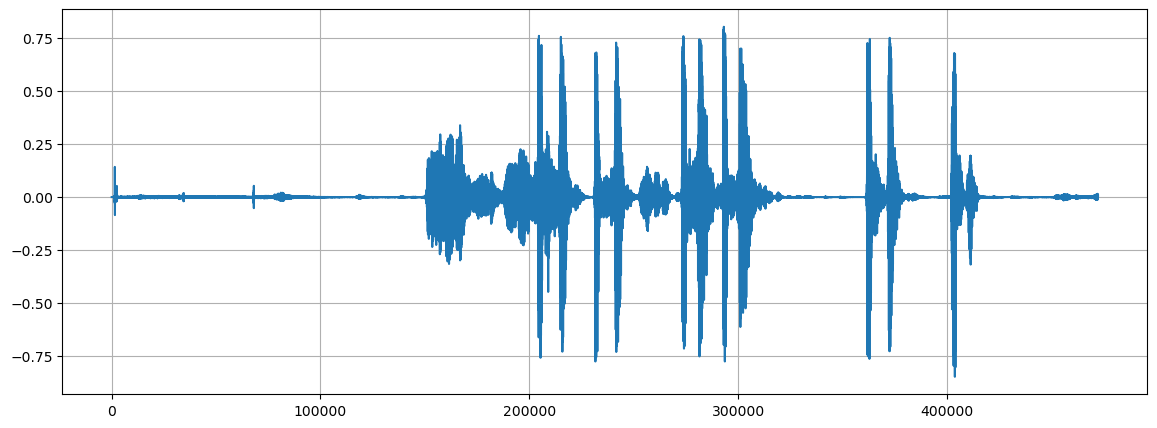

In [53]:
fig = plt.figure(figsize=(14, 5))
plt.plot(sig.t().numpy())
plt.grid()

plt.show()

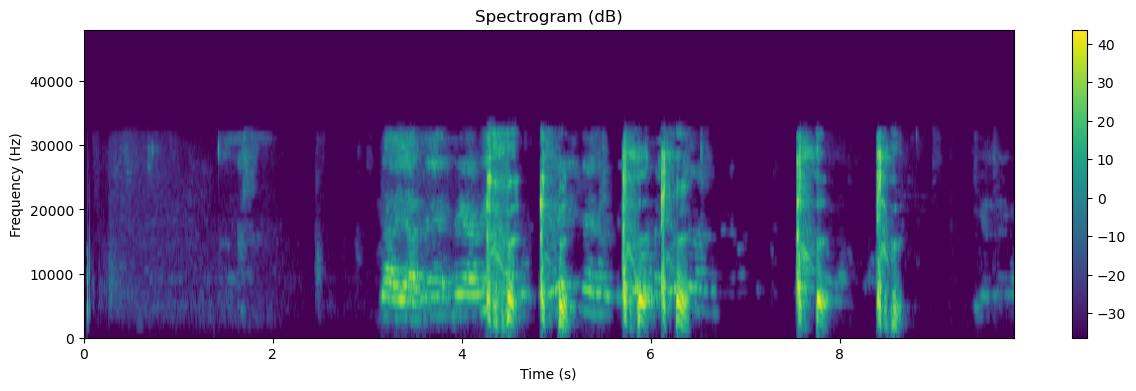

In [52]:
spec = transforms.MelSpectrogram(sr, n_fft=1024, n_mels=64)(sig)
spec = transforms.AmplitudeToDB(top_db=80)(spec)

fig, axs = plt.subplots(1, 1, figsize=(15, 4))

axs.set_title('Spectrogram (dB)')
axs.set_xlabel('Time (s)')
axs.set_ylabel('Frequency (Hz)')

im = axs.imshow(spec[0], origin='lower', aspect='auto', extent=(0, sig[0].shape[0] / sr, 0, sr))
fig.colorbar(im, ax=axs)

plt.show(block=False)